In [13]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install nltk

In [15]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests
import json
import pandas as pd
from numpy import random

import re
import nltk
from nltk.corpus import stopwords
import string

from collections import Counter
import matplotlib.pyplot as plt

from num2words import num2words
from tqdm import tqdm

In [18]:
df = pd.read_excel('../data/raw/хакатон.xlsx')
df.head(5)

,firsttext,image2text,speech2text,text,theme
0,Твой лучший секс спрятан здесь 🔞 Делюсь канал...,NaN,NaN,Твой лучший секс спрятан здесь 🔞 Делюсь канал...,"реклама, личная жизнь"
1,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,NaN,NaN,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,соцсети
2,А продолжение где? Правильно. В моем сообществ...,девчонки не умеют переписываться sanille они э...,NaN,А продолжение где? Правильно. В моем сообществ...,соцсети
3,Тем временем моя авторская телега уверенно в т...,10:42 nuil пул telegram ^ 51 142 подписчика 12...,NaN,Тем временем моя авторская телега уверенно в т...,соцсети
4,"У меня есть двоюродная сестра, у нее есть сын ...","т с не ^ е z 8 * \""8 ничего не знала о стендап...",NaN,"У меня есть двоюродная сестра, у нее есть сын ...",личная жизнь


In [19]:
def word_count(df, n = 20):
    all_text = ' '.join(df['text']).lower()         
    words_list = all_text.split()                     # Деление на слова
    word_counts = Counter(words_list)                 # Частота слов
    top_20_words = word_counts.most_common(n)       # Топ-20 слов

    # Извлекаем слова и их частоты отдельно для построения графика
    words = [w for w, _ in top_20_words]
    counts = [c for _, c in top_20_words]

    return words, counts

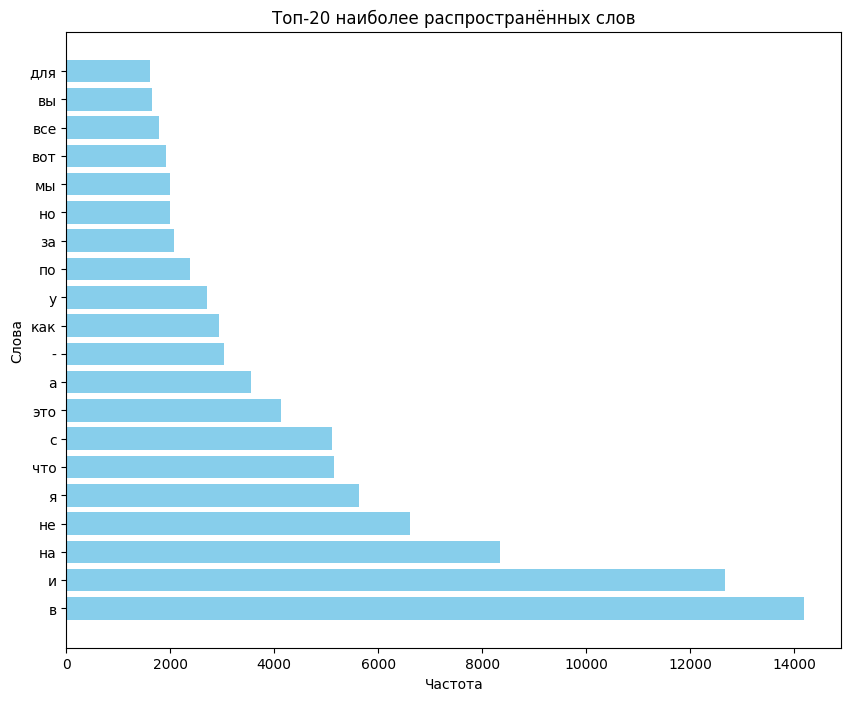

In [20]:
words, counts = word_count(df)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 8))                      # Устанавливаем размер окна
plt.barh(words, counts, color='skyblue')          # Горизонтальная гистограмма
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Топ-20 наиболее распространённых слов')
plt.show()

Очищаем от стоп-слов

In [21]:
# Загрузка списка стоп-слов русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dimac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Основная функция очистки текста
def clean_text(text):
    # 1. Удаляем ссылки
    text = re.sub(r'https?:\/\/[^ ]+', '', text)
    
    # 2. Удаляем эмодзи
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    
    # 3. Удаляем знаки препинания
    text = text.translate(str.maketrans('', '', string.punctuation + '‑‐–—―−－'))  # Добавили разные типы дефиса
    
    # 4. Приводим текст к нижнему регистру
    text = text.lower()
    
    # 5. Токенизируем текст
    tokens = text.split()
    
    # 6. Фильтруем стоп-слова и слова длиной меньше двух символов
    filtered_tokens = [
        word for word in tokens 
        if word not in stop_words and len(word) > 1 and not word.isdigit()    # Оставляем только слова больше одной буквы
    ]
    
    # 7. Собираем очищенную строку
    cleaned_text = ' '.join(filtered_tokens)
    
    # 8. Удаляем повторяющиеся пробелы
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    
    # 9. Если строка стала пустой или состоит только из цифр, возвращаем None
    if len(cleaned_text.strip()) <= 1 or cleaned_text.isdigit():
        return None
    
    return cleaned_text

In [23]:
df['text'] = df['text'].apply(clean_text)
df = df.dropna(subset=['text'])

In [24]:
df.head(5)

,firsttext,image2text,speech2text,text,theme
0,Твой лучший секс спрятан здесь 🔞 Делюсь канал...,NaN,NaN,твой лучший секс спрятан делюсь каналом диплом...,"реклама, личная жизнь"
1,⭐️ Кнопка: ⭐️START⭐️(https://t.me/major/start...,NaN,NaN,кнопка start,соцсети
2,А продолжение где? Правильно. В моем сообществ...,девчонки не умеют переписываться sanille они э...,NaN,продолжение правильно моем сообществе вк ссылк...,соцсети
3,Тем временем моя авторская телега уверенно в т...,10:42 nuil пул telegram ^ 51 142 подписчика 12...,NaN,временем авторская телега уверенно тройке силь...,соцсети
4,"У меня есть двоюродная сестра, у нее есть сын ...","т с не ^ е z 8 * \""8 ничего не знала о стендап...",NaN,двоюродная сестра сын антон двоюродный племянн...,личная жизнь


In [25]:
df = df[['text', 'theme']]

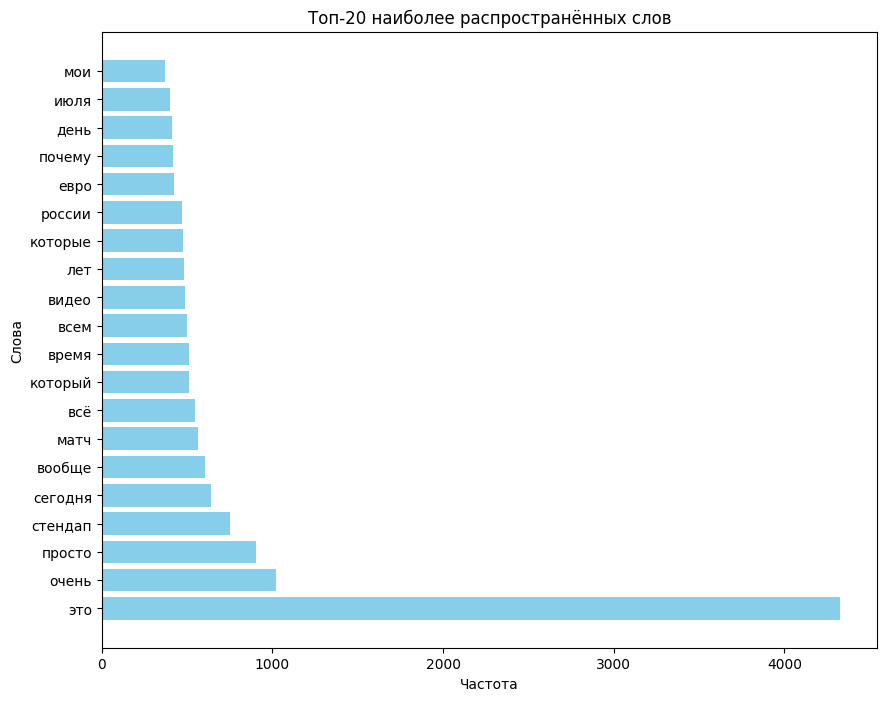

In [26]:
words, counts = word_count(df)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 8))                      # Устанавливаем размер окна
plt.barh(words, counts, color='skyblue')          # Горизонтальная гистограмма
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Топ-20 наиболее распространённых слов')
plt.show()

Убираем слово "это"

In [27]:
df['text'] = df['text'].str.replace('это', '', regex=False).str.strip()

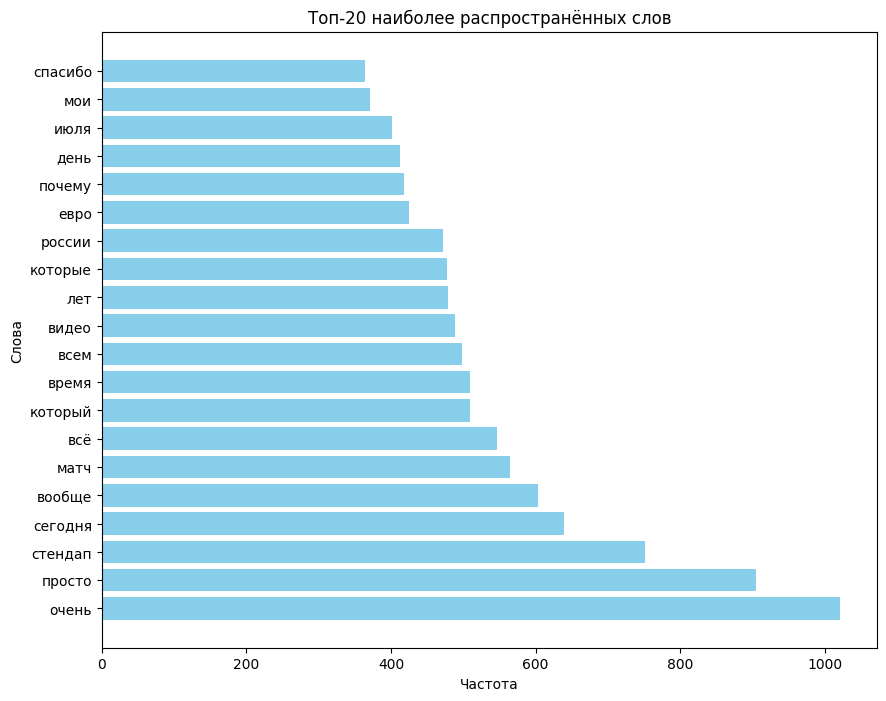

In [28]:
words, counts = word_count(df)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 8))                      # Устанавливаем размер окна
plt.barh(words, counts, color='skyblue')          # Горизонтальная гистограмма
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Топ-20 наиболее распространённых слов')
plt.show()

Заменим числа (решил вообще убрать числа)

In [29]:
# def replace_numbers_with_words(text):
#     words = []
#     for token in text.split():  # разбиваем предложение на токены
#         try:
#             number = int(token)  # пытаемся превратить токен в целое число
#             words.append(num2words(number, lang='ru'))  # если получилось, заменяем числом текстом
#         except ValueError:
#             words.append(token)  # иначе оставляем оригинальный токен
#     return ' '.join(words)  # собираем предложение обратно

# # Применяем замену чисел на слова ко всей колонке 'text'
# df['text'] = df['text'].apply(replace_numbers_with_words)

In [30]:
# words, counts = word_count(df)

# # Строим столбчатую диаграмму
# plt.figure(figsize=(10, 8))                      # Устанавливаем размер окна
# plt.barh(words, counts, color='skyblue')          # Горизонтальная гистограмма
# plt.xlabel('Частота')
# plt.ylabel('Слова')
# plt.title('Топ-20 наиболее распространённых слов')
# plt.show()

In [ ]:
API_URL = 'https://dictionary.yandex.net/api/v1/dicservice.json/lookup'
API_KEY = ''
LANGUAGE_PAIR = 'ru-ru'

def fetch_synonyms(word):
    params = {
        'key': API_KEY,
        'lang': LANGUAGE_PAIR,
        'text': word
    }
    response = requests.get(API_URL, params=params)
    data = response.json()
    try:
        synonyms = [entry['tr'][0]['text'] for entry in data['def']]
        return synonyms
    except (KeyError, IndexError):
        return None

def replace_random_words_with_synonyms(text, probability = 1):
    words = text.split(' ')
    replaced_words = []
    for word in words:
        if random.rand() < probability:
            synonyms = fetch_synonyms(word)
            if synonyms is not None and len(synonyms) > 0:
                chosen_synonym = random.choice(synonyms)
                # print('-----')
                # print(word)
                # print(chosen_synonym)
                replaced_words.append(chosen_synonym)
            else:
                replaced_words.append(word)
        else:
            replaced_words.append(word)
    return ' '.join(replaced_words)

# Добавление новых записей
new_data = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    original_text = row['text']
    new_text = replace_random_words_with_synonyms(original_text, 0.2)
    new_data.append({'text': new_text, 'theme': row['theme']})

new_df = pd.DataFrame(new_data)

100%|██████████| 5673/5673 [3:05:39<00:00,  1.96s/it]  


In [32]:
new_df.head(5)

,text,theme
0,твой лучший секс спрятан делюсь каналом диплом...,"реклама, личная жизнь"
1,клавиша start,соцсети
2,расширение правильно моем сообществе вк ссылка...,соцсети
3,временем авторская телега уверенно тройке силь...,соцсети
4,двоюродная сестра сын антон двоюродный племянн...,личная жизнь


In [33]:
result_df = pd.concat([df, new_df], ignore_index=True)
result_df = result_df.drop_duplicates()
result_df.to_excel('../data/processed/хакатон_2.xlsx')

In [34]:
result_df.shape

(5785, 2)

In [43]:
df['text'][:5].apply(lambda x: print(x))

твой лучший секс спрятан делюсь каналом дипломированного сексолога крис взломала код классного секса мастерски раскрепощает знает миллион горячих техник лучшие девайсы взрослых самые полезные посты отрезвляющий пост «я сама» прокачай наездницу ролевая игра «vip кинотеатр» техника оральных ласк занимается сeксом неудобная женщина кстати крис провела трехдневный безоплатный онлайн интенсив«от бревна богини» совместно врачом владельцем сексшопа скорее смотри записи пока удалила жарче аду
кнопка start
продолжение правильно моем сообществе вк ссылка шапке профиля девчонки умеют переписываться sanille  очень любят категорически умеют strilp
временем авторская телега уверенно тройке сильнейших компания мощная ухххх nuil пул telegram подписчика авторские маргарита симоньян соловьёв реальный губер павел островский захар прилепин поддубный мария захарова ирина волк неофициальный безсонов анастасия кашеварова андрей медведев небожена дмитрий медведев kotsnews валентина матвиенко алёна бердова лер

0    None
1    None
2    None
3    None
4    None
Name: text, dtype: object

In [44]:
new_df['text'][:5].apply(lambda x: print(x))

твой лучший секс спрятан делюсь каналом дипломированного сексолога крис взломала код классного секса умело раскрепощает знает миллион горячих механик лучшие девайсы взрослых самые полезные посты отрезвляющий пост «я сама» прокачай наездницу ролевая игра «vip кинотеатр» техника оральных ласк занимается сeксом неудобная женщина кстати крис провела трехдневный безоплатный онлайн интенсив«от бревна богини» совместно врачом владельцем сексшопа скорее смотри дневник пока удалила жарче аду
клавиша start
расширение правильно моем сообществе вк ссылка шапке профиля девчонки умеют переписываться sanille  очень любят наотрез умеют strilp
временем авторская телега уверенно тройке сильнейших компания мощная ухххх nuil пул telegram подписчика авторские маргарита симоньян соловьёв настоящий губер савл островский захар прилепин поддубный мария захарова ирина волк неофициальный безсонов анастасия кашеварова андрей медведев небожена димитрий медведев kotsnews валентин матвиенко алёна бердова лера кудряв

0    None
1    None
2    None
3    None
4    None
Name: text, dtype: object

In [45]:
res_df = pd.concat([df, new_df], ignore_index=True)
res_df.shape

(11346, 2)

In [48]:
res_df.reset_index()

,index,text,theme
0,0,твой лучший секс спрятан делюсь каналом диплом...,"реклама, личная жизнь"
1,1,кнопка start,соцсети
2,2,продолжение правильно моем сообществе вк ссылк...,соцсети
3,3,временем авторская телега уверенно тройке силь...,соцсети
4,4,двоюродная сестра сын антон двоюродный племянн...,личная жизнь
...,...,...,...
11341,11341,отказали ноги стандартная ситуация щербаков ал...,юмор
11342,11342,осторожно пропала собака алексейщербаков щерба...,NaN
11343,11343,ваших огонёчков видео телефонах огонёчки зажиг...,NaN
11344,11344,зиминарулит актрисатеатраикино викториятарасов...,NaN


In [51]:
res_df.head()

,text,theme
0,твой лучший секс спрятан делюсь каналом диплом...,"реклама, личная жизнь"
1,кнопка start,соцсети
2,продолжение правильно моем сообществе вк ссылк...,соцсети
3,временем авторская телега уверенно тройке силь...,соцсети
4,двоюродная сестра сын антон двоюродный племянн...,личная жизнь


In [53]:
res_df['class'] = res_df['theme'].apply(lambda s: [item.strip() for item in f'{s}'.split(",")])
res_df['class'].explode().value_counts()

class
спорт           3330
nan             2196
юмор            2132
реклама         2024
соцсети         1330
личная жизнь     982
политика         756
психология         2
Name: count, dtype: int64

In [56]:
def categorize_row(row):
    
    categories = row['class']

    if 'nan' in categories and len(categories) > 1:
        categories = list(filter(lambda x: x != 'nan', categories))

    if 'психология' in categories:
        categories = list(filter(lambda x: x != 'психология', categories))

    if 'nan' in categories or len(categories) == 0:
        
        text = row['text'].lower()  # Приводим текст к нижнему регистру
        
        categories = []
        
        if any(word in text for word in ['спорт', 'футбол', 'хоккей']):
            categories.append('спорт')
        if any(word in text for word in ['шутк', 'юмор', 'смешн', 'стендап']):
            categories.append('юмор')
        if any(word in text for word in ['реклама', 'продукт', 'купить', 'подписаться', 'подписывайтесь']):
            categories.append('реклама')
        if any(word in text for word in ['соцсет', 'telegram', 'vk', 'youtube', 'instagram', 'youtu.be', 't.me']):
            categories.append('соцсети')
        if any(word in text for word in ['политик', 'выборы', 'президент', 'политич', 'депутат']):
            categories.append('политика')
        if any(word in text for word in ['личная жизнь', 'отношения', 'дружба', 'любов', 'любов']):
            categories.append('личная жизнь')
        
        if not categories:
            categories.append('nan')
        
        return categories
    else:
        return categories

# Применяем функцию ко всем строкам
res_df['class'] = res_df.apply(categorize_row, axis=1)
#target_value = 'nan'
#filtered_df = filtered_df[df['темы'].apply(lambda x: target_value in x)]
#display(filtered_df.head(10))

res_df['class'].explode().value_counts()

class
спорт           3440
юмор            2182
реклама         2098
nan             1831
соцсети         1430
личная жизнь    1064
политика         778
Name: count, dtype: int64

In [57]:
import ast

res_df['class'] = res_df['class'].apply(lambda x: [] if ast.literal_eval(str(x))[0] == 'nan' else x)
res_df.head(10)

,text,theme,class
0,твой лучший секс спрятан делюсь каналом диплом...,"реклама, личная жизнь","[реклама, личная жизнь]"
1,кнопка start,соцсети,[соцсети]
2,продолжение правильно моем сообществе вк ссылк...,соцсети,[соцсети]
3,временем авторская телега уверенно тройке силь...,соцсети,[соцсети]
4,двоюродная сестра сын антон двоюродный племянн...,личная жизнь,[личная жизнь]
5,временем авторская телега уверенно тройке силь...,соцсети,[соцсети]
6,мои ученики ко возвращаются мои волшебные пред...,реклама,[реклама]
7,ютюб канале olympics дни идут прямые трансляци...,"спорт, соцсети","[спорт, соцсети]"
8,смотреть раздевалка №12 сергей орлов александр...,спорт,[спорт]
9,сегодня день рождения матвея кисляка выпуск мо...,спорт,[спорт]


In [58]:
res_df = res_df.drop(columns=['theme'])

In [59]:
res_df.to_csv('../data/processed/cleared_new.csv')

In [65]:
res_df[(res_df['class'].apply(lambda x: len(x) != 1) )].head(100)

,text,class
0,твой лучший секс спрятан делюсь каналом диплом...,"[реклама, личная жизнь]"
7,ютюб канале olympics дни идут прямые трансляци...,"[спорт, соцсети]"
20,дней лечу париж олимпийские игры буду постить ...,"[спорт, личная жизнь]"
22,срочно нужен кофе,[]
30,сходил гости пацанам поговорили деньги🤑 только...,"[спорт, юмор]"
...,...,...
334,первый выпуск токсиков готовы старались успеть...,"[юмор, реклама]"
337,глушенков прибавил всем прибавил,"[юмор, спорт]"
340,всем привет сегодня ждет новый выпуск рецепт с...,[]
346,человек умеет задавать интересные вопросы свои...,"[реклама, соцсети]"


In [60]:
df_one = res_df[res_df['class'].apply(lambda x: len(x) == 1)]
df_one['class'] = df_one['class'].apply(lambda x: x[0])
df_one['class'].value_counts()

C:\Users\dimac\AppData\Local\Temp\ipykernel_40500\340128769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['class'] = df_one['class'].apply(lambda x: x[0])


class
спорт           2632
юмор            1690
реклама         1492
личная жизнь     903
соцсети          849
политика         484
Name: count, dtype: int64

In [66]:
res_df.to_csv('../data/processed/cleared_one_class.csv')